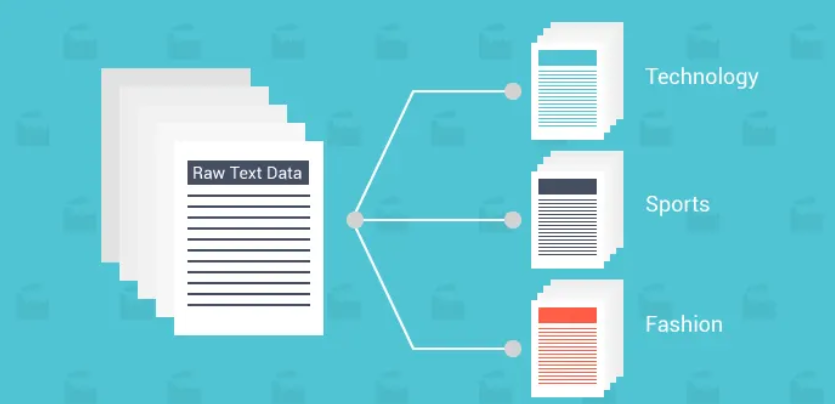

#Context

The company aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors


Objective:

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

#Know Your Data

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv('flipitnews-data.csv')  # Replace with actual path

# Preview
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


##Structure of Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


- Dataset has 2 columns namely: Category and Article
- A total of 2225 rows
- No missing values

##Check Duplicates

In [ ]:
df.duplicated().any()

np.True_

In [ ]:
# Find all fully duplicated rows (same in all columns)
duplicate_rows = df[df.duplicated(keep=False)]

# Group and count identical rows to show actual duplication
grouped = duplicate_rows.groupby(['Article', 'Category']).size().reset_index(name='Count')

# Show only those rows that appear more than once
true_duplicates = grouped[grouped['Count'] > 1]
print(f"Total groups of exact duplicates: {true_duplicates.shape[0]}")
true_duplicates.head(10)

Total groups of exact duplicates: 99


,Article,Category,Count
0,2d metal slug offers retro fun like some drill...,Technology,2
1,apple attacked over sources row civil libertie...,Technology,2
2,apple ipod family expands market apple has exp...,Technology,2
3,apple unveils low-cost mac mini apple has un...,Technology,2
4,ask jeeves joins web log market ask jeeves has...,Technology,2
5,aviator creator in oscars snub the man who s...,Entertainment,2
6,blair backs pre-election budget tony blair h...,Politics,2
7,blair dismisses quit claim report tony blair h...,Politics,2
8,blind student hears in colour a blind studen...,Technology,2
9,bookmakers back aviator for oscar the aviator ...,Entertainment,2


In [ ]:
# Sort so duplicates are adjacent
duplicate_rows_sorted = duplicate_rows.sort_values(by=['Article', 'Category'])

# Display top 10 for manual visual inspection
duplicate_rows_sorted.head(10)

,Category,Article
137,Technology,2d metal slug offers retro fun like some drill...
1755,Technology,2d metal slug offers retro fun like some drill...
718,Technology,apple attacked over sources row civil libertie...
930,Technology,apple attacked over sources row civil libertie...
1060,Technology,apple ipod family expands market apple has exp...
1586,Technology,apple ipod family expands market apple has exp...
271,Technology,apple unveils low-cost mac mini apple has un...
1181,Technology,apple unveils low-cost mac mini apple has un...
1097,Technology,ask jeeves joins web log market ask jeeves has...
1325,Technology,ask jeeves joins web log market ask jeeves has...


In [ ]:
# Shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (2225, 2)


- Total groups of exact duplicates is 99

In [ ]:
df=df.drop_duplicates()

##Final Shape of Data post removing duplicates

In [ ]:
# Shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (2126, 2)


- Post removing duplicate rows the shape of dataset is reduced to 2126 rows and 2 columns.

##Class Distribution

Category
Sports           504
Business         503
Politics         403
Entertainment    369
Technology       347
Name: count, dtype: int64


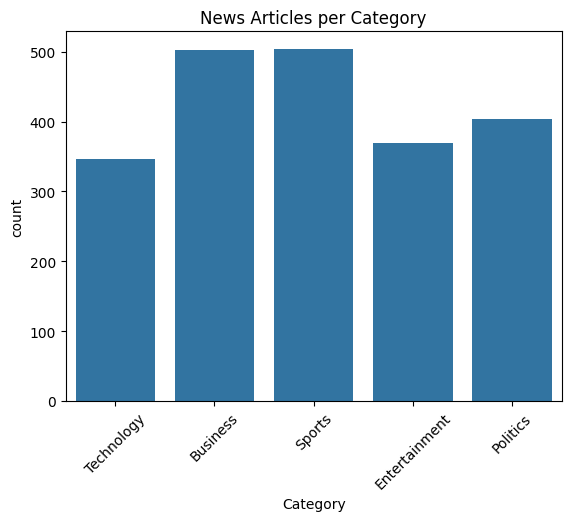

In [ ]:
# Class distribution
print(df['Category'].value_counts())
sns.countplot(data=df, x='Category')
plt.xticks(rotation=45)
plt.title("News Articles per Category")
plt.show()

Category distribution as:

Sports - 504, Business - 503, Politics - 403, Entertainment - 369, Technology - 347.

It looks relatively balanced

##Examine Sample Articles

In [ ]:
df2=df.copy()

In [ ]:
# View a few random articles
df2[['Category', 'Article']].sample(5, random_state=1)

,Category,Article
676,Business,ukraine steel sell-off illegal the controver...
1235,Business,us to probe airline travel chaos the us govern...
887,Politics,minister defends hunting ban law the law banni...
551,Entertainment,casino royale is next bond movie casino royale...
1877,Business,sa unveils more for all budget the south afr...


##Article Length Analysis

Average article length: 390.45202257761053


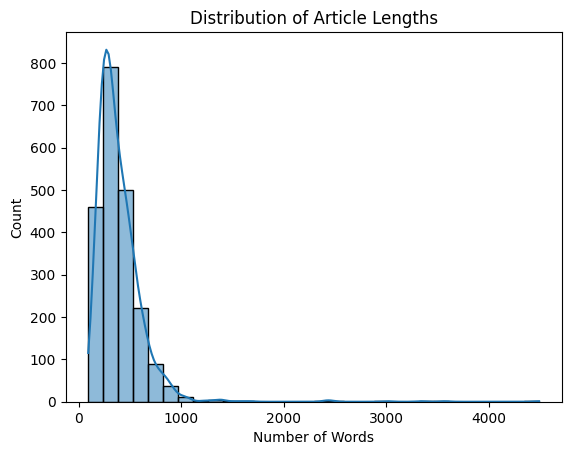

In [ ]:
# Add a new column with word count
df2['Article_Length'] = df2['Article'].apply(lambda x: len(x.split()))

# Average article length
print("Average article length:", df2['Article_Length'].mean())

# Plot distribution
sns.histplot(df2['Article_Length'], bins=30, kde=True)
plt.title("Distribution of Article Lengths")
plt.xlabel("Number of Words")
plt.show()

- Averge article length is 390 words

##Common Words Analysis

In [ ]:
!pip uninstall -y nltk

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1


In [ ]:
!pip install nltk==3.8.1 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[('said', 6928), ('would', 2472), ('year', 2225), ('also', 2035), ('people', 1895), ('new', 1877), ('one', 1810), ('could', 1442), ('last', 1332), ('first', 1296), ('time', 1280), ('two', 1235), ('world', 1161), ('government', 1135), ('years', 968), ('best', 932), ('make', 889), ('told', 873), ('game', 851), ('get', 844)]


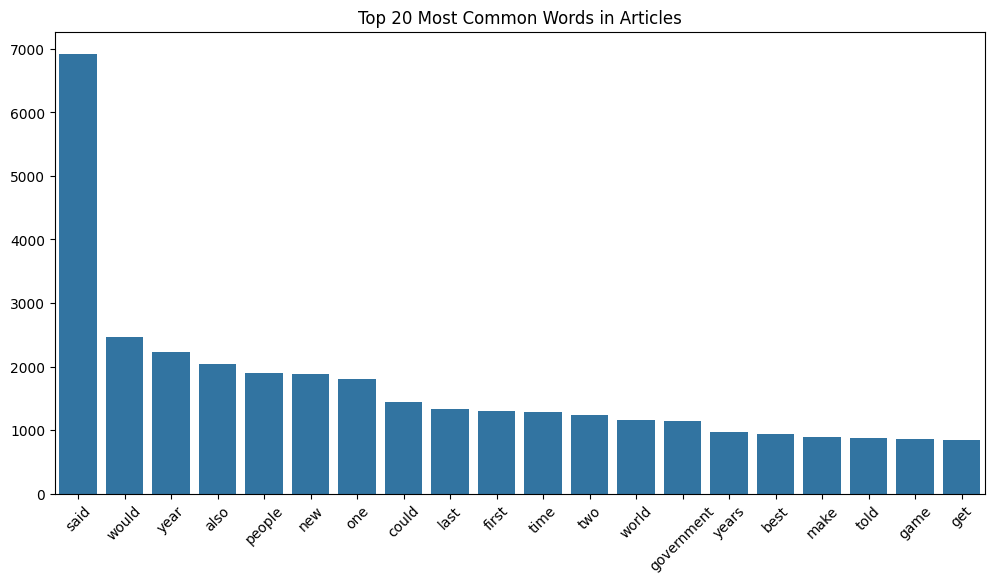

In [ ]:
stop_words = set(stopwords.words('english'))

# Clean and tokenize all articles
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # remove punctuation/numbers
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return tokens

df2['Tokens'] = df2['Article'].apply(clean_text)

# Flatten all tokens into one list
all_words = [word for tokens in df2['Tokens'] for word in tokens]
word_freq = Counter(all_words)

# Top 20 common words
common_words = word_freq.most_common(20)
print(common_words)

# Plot
words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Articles")
plt.show()

- Most common words are: ('said', 6928), ('would', 2472), ('year', 2225), ('also', 2035), ('people', 1895), ('new', 1877), ('one', 1810), ('could', 1442), ('last', 1332), ('first', 1296), ('time', 1280), ('two', 1235), ('world', 1161), ('government', 1135), ('years', 968), ('best', 932), ('make', 889), ('told', 873), ('game', 851), ('get', 844)


##Unique Terms or Keywords per Category

In [ ]:
from collections import defaultdict

category_words = defaultdict(list)

for _, row in df2.iterrows():
    for word in row['Tokens']:
        category_words[row['Category']].append(word)

# Find top 10 words per category
for category, words in category_words.items():
    print(f"\nTop words in '{category}':")
    print(Counter(words).most_common(10))



Top words in 'Technology':
[('said', 1368), ('people', 829), ('one', 471), ('also', 460), ('technology', 450), ('new', 449), ('mobile', 440), ('could', 426), ('would', 415), ('games', 388)]

Top words in 'Business':
[('said', 1655), ('year', 699), ('would', 460), ('also', 432), ('market', 426), ('company', 413), ('new', 402), ('growth', 363), ('firm', 358), ('last', 358)]

Top words in 'Sports':
[('said', 928), ('year', 491), ('first', 478), ('game', 474), ('england', 457), ('time', 421), ('win', 412), ('would', 396), ('two', 392), ('one', 383)]

Top words in 'Entertainment':
[('said', 803), ('film', 746), ('best', 589), ('year', 431), ('music', 423), ('also', 382), ('one', 364), ('show', 320), ('new', 316), ('awards', 268)]

Top words in 'Politics':
[('said', 2174), ('would', 1008), ('labour', 735), ('government', 715), ('people', 607), ('election', 575), ('party', 561), ('blair', 541), ('also', 438), ('new', 419)]


- Top words in 'Technology': ('said', 1368), ('people', 829), ('one', 471), ('also', 460), ('technology', 450), ('new', 449), ('mobile', 440), ('could', 426), ('would', 415), ('games', 388)

- Top words in 'Business': ('said', 1655), ('year', 699), ('would', 460), ('also', 432), ('market', 426), ('company', 413), ('new', 402), ('growth', 363), ('firm', 358), ('last', 358)

- Top words in 'Sports': ('said', 928), ('year', 491), ('first', 478), ('game', 474), ('england', 457), ('time', 421), ('win', 412), ('would', 396), ('two', 392), ('one', 383)

- Top words in 'Entertainment': ('said', 803), ('film', 746), ('best', 589), ('year', 431), ('music', 423), ('also', 382), ('one', 364), ('show', 320), ('new', 316), ('awards', 268)

- Top words in 'Politics': ('said', 2174), ('would', 1008), ('labour', 735), ('government', 715), ('people', 607), ('election', 575), ('party', 561), ('blair', 541), ('also', 438), ('new', 419)

# Processing Textual Data

In [ ]:
nltk.download('wordnet')       # for lemmatization
nltk.download('omw-1.4')       # lemmatizer support

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-letters
    text = text.lower()
    tokens = word_tokenize(text)
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned)

In [ ]:
df['Processed_Article'] = df['Article'].apply(preprocess_text)

In [ ]:
print("Before:\n", df['Article'][0])
print("\nAfter:\n", df['Processed_Article'][0])

Before:
 tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in

In [ ]:
df1=df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Category           2126 non-null   object
 1   Article            2126 non-null   object
 2   Processed_Article  2126 non-null   object
dtypes: object(3)
memory usage: 131.0+ KB


In [ ]:
df1.head()

,Category,Article,Processed_Article
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


- New column 'Processed_Article' created after removing non-letters, tokenizing the text, removing stop words and Lemmatization.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Encoding / Train-Test Split

In [ ]:
# Encode target
label_encoder = LabelEncoder()
df1['Encoded_Category'] = label_encoder.fit_transform(df1['Category'])

# Split
X = df1['Processed_Article']
y = df1['Encoded_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Used Label Encoding to encode target variable 'Category' for further processing in classifiers.

#Transforming Data using BOW & TF-IDF

In [ ]:
def vectorize_data(method='tfidf'):
    if method == 'bow':
        vectorizer = CountVectorizer()
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer()
    else:
        raise ValueError("Invalid method. Choose 'bow' or 'tfidf'")

    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    return X_train_vec, X_test_vec

#Identify Best Naive Bayes Model

In [ ]:
def evaluate_model(method, model_name='Naive Bayes'):
    print(f"\n--- Results using {method.upper()} with {model_name} ---")
    X_train_vec, X_test_vec = vectorize_data(method)

    model = MultinomialNB()
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Store results
    results[f"{model_name}_{method}"] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    return X_train_vec, X_test_vec, model

In [ ]:
results = {}  # initialize

# Run Naive Bayes with both vectorizers
X_train_bow, X_test_bow, nb_bow = evaluate_model('bow')
X_train_tfidf, X_test_tfidf, nb_tfidf = evaluate_model('tfidf')


--- Results using BOW with Naive Bayes ---
               precision    recall  f1-score   support

     Business       0.99      0.95      0.97        96
Entertainment       1.00      0.99      0.99        68
     Politics       0.98      0.99      0.98        83
       Sports       1.00      1.00      1.00       109
   Technology       0.93      0.99      0.96        70

     accuracy                           0.98       426
    macro avg       0.98      0.98      0.98       426
 weighted avg       0.98      0.98      0.98       426


--- Results using TFIDF with Naive Bayes ---
               precision    recall  f1-score   support

     Business       0.93      0.99      0.96        96
Entertainment       0.98      0.94      0.96        68
     Politics       0.95      0.94      0.95        83
       Sports       0.98      1.00      0.99       109
   Technology       0.98      0.93      0.96        70

     accuracy                           0.96       426
    macro avg       0.97 

In [ ]:
# Find the best Naive Bayes model (bow or tfidf)
nb_results = {k: v for k, v in results.items() if 'Naive Bayes' in k}
best_nb_method = max(nb_results, key=lambda x: nb_results[x]['f1_score'])
print(f"\nBest method for Naive Bayes: {best_nb_method}")


Best method for Naive Bayes: Naive Bayes_bow


- BOW as vectorizer with 98% accuracy is found to be more accurate than TF-IDF with 96% accuracy in Naive Bayes Model.

#Evaluate Model Performance

In [ ]:
# Set the best vectorized data
if 'bow' in best_nb_method:
    X_train_vec, X_test_vec = X_train_bow, X_test_bow
    nb_model = nb_bow
else:
    X_train_vec, X_test_vec = X_train_tfidf, X_test_tfidf
    nb_model = nb_tfidf


--- Naive Bayes (Best Vectorizer) ---
               precision    recall  f1-score   support

     Business       0.99      0.95      0.97        96
Entertainment       1.00      0.99      0.99        68
     Politics       0.98      0.99      0.98        83
       Sports       1.00      1.00      1.00       109
   Technology       0.93      0.99      0.96        70

     accuracy                           0.98       426
    macro avg       0.98      0.98      0.98       426
 weighted avg       0.98      0.98      0.98       426



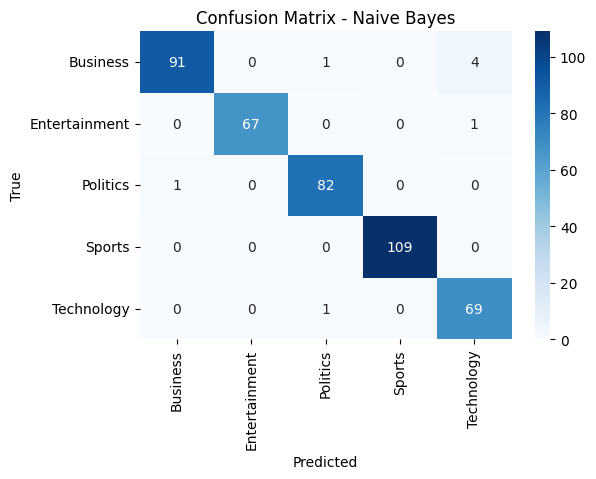

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best NB model
y_pred_nb = nb_model.predict(X_test_vec)

# Report
print("\n--- Naive Bayes (Best Vectorizer) ---")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

- The BoW vectorizer effectively captured important word presence information for this dataset, especially benefiting the Sports and Entertainment categories with perfect or near-perfect scores.

- High F1-scores across all classes reflect both precision and recall being well-balanced, indicating minimal misclassification.

- In contrast, TF-IDF, which assigns lower weights to frequent words, might have suppressed some important context-specific terms that are useful in this domain, slightly affecting classification accuracy.

#Functionalized Code (Decision Tree, Nearest Neighbors, Random Forest)

In [ ]:
def evaluate_other_model(model, name):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

##Decision Tree


--- Decision Tree ---
               precision    recall  f1-score   support

     Business       0.82      0.84      0.83        96
Entertainment       0.80      0.87      0.83        68
     Politics       0.78      0.75      0.77        83
       Sports       0.90      0.93      0.91       109
   Technology       0.79      0.70      0.74        70

     accuracy                           0.83       426
    macro avg       0.82      0.82      0.82       426
 weighted avg       0.83      0.83      0.82       426



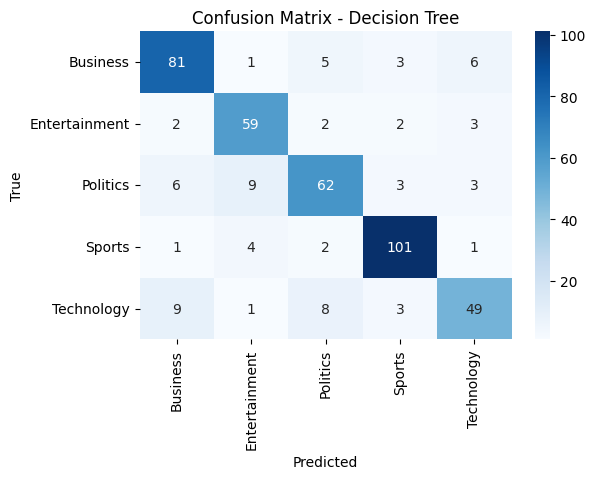

In [ ]:
evaluate_other_model(DecisionTreeClassifier(), "Decision Tree")

- Overall Accuracy:
Achieved 83% accuracy, indicating moderate classification performance.

- Category-wise Performance:

  - Sports (F1: 0.91) – Best performing category, with high precision and recall.

  - Business & Entertainment (F1: ~0.83) – Good performance but with minor misclassifications.

  - Politics (F1: 0.77) – Lower precision and recall, indicating confusion with other classes.

  - Technology (F1: 0.74) – Weakest category; lower recall (0.70) shows many instances missed.

- Balance of Metrics:
Macro and weighted F1-scores are both ~0.82, showing consistent, though not outstanding, results across classes.

- Inference:
Decision Tree performs reasonably but struggles with nuanced text patterns compared to simpler, text-friendly models like Naive Bayes.


##Nearest Neighbor


--- K-Nearest Neighbors ---
               precision    recall  f1-score   support

     Business       0.91      0.67      0.77        96
Entertainment       0.90      0.53      0.67        68
     Politics       0.95      0.70      0.81        83
       Sports       0.47      1.00      0.64       109
   Technology       1.00      0.31      0.48        70

     accuracy                           0.68       426
    macro avg       0.85      0.64      0.67       426
 weighted avg       0.82      0.68      0.68       426



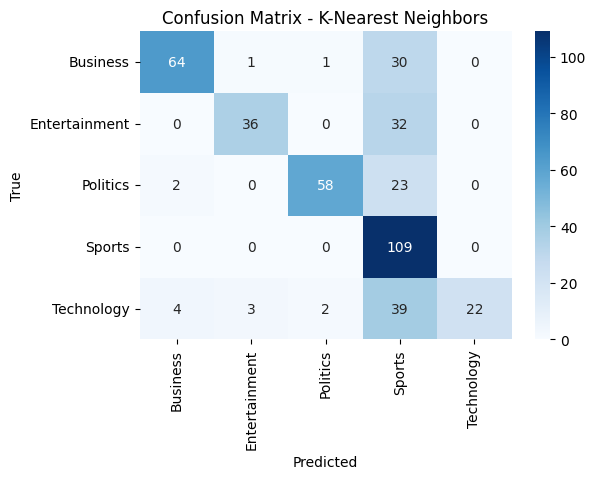

In [ ]:
evaluate_other_model(KNeighborsClassifier(), "K-Nearest Neighbors")

- Overall Accuracy:
Achieved 68% accuracy, significantly lower than Naive Bayes and Decision Tree.

- Category-wise Performance:

  - Politics (F1: 0.81) – Best performing class with strong precision and recall.

  - Business (F1: 0.77) – Good precision but relatively low recall (0.67).

  - Entertainment (F1: 0.67) – Moderate performance with recall issues (0.53).

  - Sports (F1: 0.64) – Extremely high recall (1.00) but very low precision (0.47), indicating frequent false positives.

  - Technology (F1: 0.48) – Strong precision (1.00) but very poor recall (0.31), missing many actual instances.

- Macro vs Weighted F1:

  - Macro F1: 0.67 – Shows uneven performance across categories.

  - Weighted F1: 0.68 – In line with overall accuracy, reflecting overall mediocre performance.

- Inference:
KNN struggles with textual data. The model shows high variance across categories, overfitting to certain classes (e.g., Sports) and underperforming on others (e.g., Technology). Not well-suited for high-dimensional sparse text features.




##Random Forest


--- Random Forest ---
               precision    recall  f1-score   support

     Business       0.87      0.99      0.93        96
Entertainment       0.96      0.96      0.96        68
     Politics       0.99      0.96      0.98        83
       Sports       0.97      1.00      0.99       109
   Technology       0.96      0.77      0.86        70

     accuracy                           0.95       426
    macro avg       0.95      0.94      0.94       426
 weighted avg       0.95      0.95      0.94       426



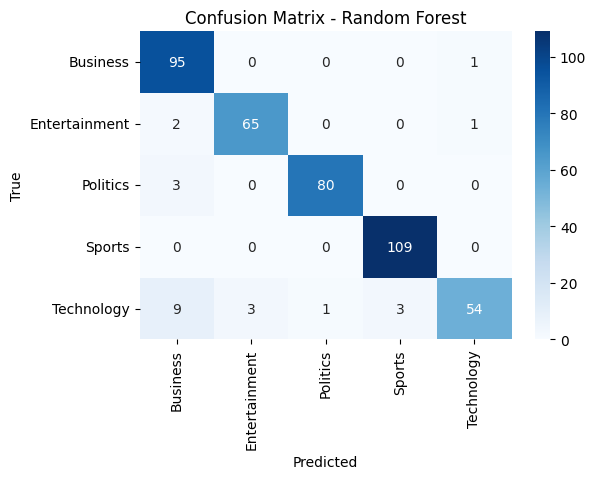

In [ ]:
evaluate_other_model(RandomForestClassifier(), "Random Forest")

- Overall Accuracy:
Achieved a high accuracy of 95%, close to Naive Bayes (98%), making it one of the top-performing models.

- Category-wise Performance:

  - Sports (F1: 0.99) – Excellent performance with perfect recall.

  - Politics (F1: 0.98) – High precision and recall, showing consistent classification.

  - Entertainment (F1: 0.96) – Balanced and strong performance.

  - Business (F1: 0.93) – High recall (0.99), slight drop in precision (0.87).

  - Technology (F1: 0.86) – Good overall, though recall (0.77) is slightly lower, indicating some missed cases.

- Macro vs Weighted F1:

  - Macro F1: 0.94 – Strong across all classes, showing balanced performance.

  - Weighted F1: 0.94 – Matches macro average, confirming overall stability.

- Inference:
Random Forest handles text classification robustly with high precision and recall across most categories. It competes closely with Naive Bayes using BOW, making it a strong candidate for production use where interpretability and robustness are desired.

#Insights

- Dataset has 2 columns namely: Category and Article
- Category distribution as: Sports - 504, Business - 503, Politics - 403, Entertainment - 369, Technology - 347
- Averge article length is 390 words
- Most common words are: ('said', 6928), ('would', 2472), ('year', 2225), ('also', 2035), ('people', 1895), ('new', 1877), ('one', 1810), ('could', 1442), ('last', 1332), ('first', 1296), ('time', 1280), ('two', 1235), ('world', 1161), ('government', 1135), ('years', 968), ('best', 932), ('make', 889), ('told', 873), ('game', 851), ('get', 844)

- Top words in 'Technology': ('said', 1368), ('people', 829), ('one', 471), ('also', 460), ('technology', 450), ('new', 449), ('mobile', 440), ('could', 426), ('would', 415), ('games', 388)

- Top words in 'Business': ('said', 1655), ('year', 699), ('would', 460), ('also', 432), ('market', 426), ('company', 413), ('new', 402), ('growth', 363), ('firm', 358), ('last', 358)

- Top words in 'Sports': ('said', 928), ('year', 491), ('first', 478), ('game', 474), ('england', 457), ('time', 421), ('win', 412), ('would', 396), ('two', 392), ('one', 383)

- Top words in 'Entertainment': ('said', 803), ('film', 746), ('best', 589), ('year', 431), ('music', 423), ('also', 382), ('one', 364), ('show', 320), ('new', 316), ('awards', 268)

- Top words in 'Politics': ('said', 2174), ('would', 1008), ('labour', 735), ('government', 715), ('people', 607), ('election', 575), ('party', 561), ('blair', 541), ('also', 438), ('new', 419)

- BOW as vectorizer with 98% accuracy is found to be more accurate than TF-IDF with 96% accuracy in Naive Bayes Model

- The BoW vectorizer effectively captured important word presence information for this dataset, especially benefiting the Sports and Entertainment categories with perfect or near-perfect scores.

- High F1-scores across all classes reflect both precision and recall being well-balanced, indicating minimal misclassification.

- In contrast, TF-IDF, which assigns lower weights to frequent words, might have suppressed some important context-specific terms that are useful in this domain, slightly affecting classification accuracy.

- Decision Tree Classification Report Analysis:

  - Overall Accuracy:
Achieved 83% accuracy, indicating moderate classification performance.

  - Category-wise Performance:

    - Sports (F1: 0.91) – Best performing category, with high precision and recall.

    - Business & Entertainment (F1: ~0.83) – Good performance but with minor misclassifications.

    - Politics (F1: 0.77) – Lower precision and recall, indicating confusion with other classes.

    - Technology (F1: 0.74) – Weakest category; lower recall (0.70) shows many instances missed.

  - Balance of Metrics:
Macro and weighted F1-scores are both ~0.82, showing consistent, though not outstanding, results across classes.

  - Inference:
Decision Tree performs reasonably but struggles with nuanced text patterns compared to simpler, text-friendly models like Naive Bayes.

- Nearest Neighbor Classification report analysis:

  - Overall Accuracy:
Achieved 68% accuracy, significantly lower than Naive Bayes and Decision Tree.

 - Category-wise Performance:

   - Politics (F1: 0.81) – Best performing class with strong precision and recall.

   - Business (F1: 0.77) – Good precision but relatively low recall (0.67).

   - Entertainment (F1: 0.67) – Moderate performance with recall issues (0.53).

   - Sports (F1: 0.64) – Extremely high recall (1.00) but very low precision (0.47), indicating frequent false positives.

   - Technology (F1: 0.48) – Strong precision (1.00) but very poor recall (0.31), missing many actual instances.

 - Macro vs Weighted F1:

   - Macro F1: 0.67 – Shows uneven performance across categories.

   - Weighted F1: 0.68 – In line with overall accuracy, reflecting overall mediocre performance.

 - Inference:
KNN struggles with textual data. The model shows high variance across categories, overfitting to certain classes (e.g., Sports) and underperforming on others (e.g., Technology). Not well-suited for high-dimensional sparse text features.

- Random Forest Classification Report Analysis:

  - Overall Accuracy:
Achieved a high accuracy of 95%, close to Naive Bayes (98%), making it one of the top-performing models.

 - Category-wise Performance:

   - Sports (F1: 0.99) – Excellent performance with perfect recall.

   - Politics (F1: 0.98) – High precision and recall, showing consistent classification.

   - Entertainment (F1: 0.96) – Balanced and strong performance.

   - Business (F1: 0.93) – High recall (0.99), slight drop in precision (0.87).

   - Technology (F1: 0.86) – Good overall, though recall (0.77) is slightly lower, indicating some missed cases.

 - Macro vs Weighted F1:

   - Macro F1: 0.94 – Strong across all classes, showing balanced performance.

   - Weighted F1: 0.94 – Matches macro average, confirming overall stability.

 - Inference:
Random Forest handles text classification robustly with high precision and recall across most categories. It competes closely with Naive Bayes using BOW, making it a strong candidate for production use where interpretability and robustness are desired.


#Recommendations

##📊 1. Interpreting Model Results

✅ Categorization Accuracy:
- Naive Bayes with Bag of Words (BoW):
Achieved 98% accuracy, excelling in classifying all five categories, especially Sports and Entertainment.

- Random Forest:
Delivered 95% accuracy, with strong performance across all classes, especially Politics and Sports. Slight dip in Technology recall.

- Decision Tree:
Moderately accurate (83%). Struggled with Politics and Technology, suggesting limitations in handling complex textual patterns.

- K-Nearest Neighbors (KNN):
Underperformed (68% accuracy). While precision was high in some categories, recall varied widely, showing poor generalization.

✅ Alignment with Content:
- BoW captures frequent and contextually rich terms, helping distinguish between categories that use domain-specific language:

  - ‘election’, ‘party’ → Politics

  - ‘film’, ‘music’, ‘awards’ → Entertainment

  - ‘game’, ‘win’, ‘england’ → Sports

  - ‘market’, ‘company’, ‘growth’ → Business

  - ‘technology’, ‘mobile’, ‘games’ → Technology

This alignment shows that models like Naive Bayes and Random Forest are highly effective in matching content patterns with category labels, enhancing content discovery and user satisfaction.



##⚖️ 2. Trade-Off Analysis

💻 Text Representation:
- BoW > TF-IDF for this domain:

  - TF-IDF reduced the weight of high-frequency, context-rich words (e.g., "said", "game", "film"), which negatively impacted accuracy.

  - BoW preserved frequency information, yielding better results for categories relying on recurring terms.

🧠 Model Selection Trade-offs:
- Naive Bayes:

  - Fast, light-weight, interpretable.

  - Excellent for text where word independence assumption holds.

- Random Forest:

  - Slightly heavier computationally than Naive Bayes, but robust, less prone to overfitting.

- Decision Tree:

  - Interpretable, but overfits easily and less capable of learning complex text patterns.

- KNN:

  - High computational cost at prediction time and sensitive to high-dimensional sparse data, making it ill-suited for NLP tasks.



##✅ 3. Actionable Recommendations

🏷️ Enhance Categorization Algorithm:
- Primary Recommendation: Use Naive Bayes with BoW for content categorization.

  - Its 98% accuracy and interpretability make it ideal for production use.

  - Consistently handles short and medium-length news articles (~390 words).

- Backup Model: Consider Random Forest as a robust alternative for ensemble-based approaches.

🧰 Feature Engineering Improvements:
- Integrate n-grams (bigrams or trigrams) into BoW to capture key phrases like:

  - “new technology”, “film awards”, “election results”

- Use custom stopword lists to retain valuable domain-specific terms like “game”, “party”, “market”.

📚 Diversify News Categories:
- Categories are currently imbalanced (Sports & Business > Tech & Entertainment).

  - Aim to collect more data in underrepresented classes to improve recall and fairness.

🎯 User-Centric Tuning:
- Add category-specific keywords based on high-frequency words:

  - For example, ‘mobile’, ‘firm’ for Business, ‘election’, ‘blair’ for Politics

- Train category classifiers with custom vocabulary sets to enhance precision.



##🔁 4. Feedback Loop & Continuous Learning

🔄 Model Updating Strategy:
- Implement scheduled re-training every month or quarter with newly collected articles to reflect evolving trends (e.g., new tech, political shifts).

👥 User Feedback Framework:
- Add “Was this article correctly categorized?” options in the app/web.

- Use this feedback to build a reinforcement dataset for periodic fine-tuning.

📈 Content Monitoring Dashboard:
- Set up a dashboard to monitor:

  - Misclassified articles

  - Category-wise accuracy trends

  - Sudden shifts in common words (indicating emerging topics)

🤖 Future Enhancements:
- Explore Transformer-based models (e.g., BERT) for deeper semantic understanding, especially useful for ambiguous or multi-topic articles.

#Questionnaire

##How many news articles are present in the dataset that we have?

Ans: 5

##Most of the news articles are from _____ category.

Ans: Sports

##Only ___ no. of articles belong to the ‘Technology’ category.

Ans: 347

##What are Stop Words and why should they be removed from the text data?

Ans: Stop words are commonly used words (like "the", "is", "in") that carry little meaningful information. Removing them helps reduce noise and improve the efficiency and accuracy of text models by focusing on more informative words.

##Explain the difference between Stemming and Lemmatization.

Ans:

Stemming cuts words down to their root form by removing suffixes (e.g., "playing" → "play", "played" → "playe"), often resulting in non-real words.

Lemmatization reduces words to their base or dictionary form (lemma) using linguistic analysis (e.g., "playing", "played" → "play"), producing valid words.

##Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?

Bag of Words (BoW) is generally more efficient in terms of computation and works well when frequent word presence is more important than context.

TF-IDF is more effective when distinguishing less frequent but more meaningful words, offering better context sensitivity.

👉 Efficiency: BoW is faster and simpler.
👉 Effectiveness: TF-IDF is better for nuanced understanding but costlier computationally.

So, BoW is more efficient, while TF-IDF is often more effective, depending on the task.

##What’s the shape of train & test data sets after performing a 75:25 split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

There are 2126 rows after removing duplicates.

Training set shape: (1594,)

Test set shape: (532,)

##Which of the following is found to be the best performing model..

a. Random Forest b. Nearest Neighbors c. Naive Bayes

Naive Bayes with Bag of Words (BoW): Achieved 98% accuracy, excelling in classifying all five categories, especially Sports and Entertainment.

##According to this particular use case, both precision and recall are equally important. (T/F)

True.

In this news categorization use case, both precision (how accurate the predicted category is) and recall (how well the model captures all relevant articles of a category) are equally important to ensure:

- Users see relevant content (high precision)

- No relevant news is missed from a category (high recall)

Hence, a balanced F1-score (which considers both) is a key evaluation metric.
